In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import files
uploaded = files.upload()

Saving employee (2).csv to employee (2).csv


In [3]:
df = pd.read_csv(open('employee (2).csv','rb'))

In [8]:
print(df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary', 'left'],
      dtype='object')


Бинарная классификация без балансировки:
Average Accuracy: 0.9461296876736689
Average Precision: 0.9464078689772641
Average Recall: 0.9461296876736689

Бинарная классификация с SMOTE:
Average Accuracy: 0.9431959986662222
Average Precision: 0.944226978045705
Average Recall: 0.9431959986662222

Бинарная классификация с TomekLinks:
Average Accuracy: 0.9444627542514171
Average Precision: 0.9448982155342769
Average Recall: 0.9444627542514171

Мультиклассовая классификация без балансировки:
Average Accuracy: 0.5258360120040013
Average Precision: 0.5326958532506835
Average Recall: 0.5258360120040013

Мультиклассовая классификация с SMOTE:
Average Accuracy: 0.48196627764810496
Average Precision: 0.530666231662053
Average Recall: 0.48196627764810496

Мультиклассовая классификация с TomekLinks:
Average Accuracy: 0.5149685673002112
Average Precision: 0.5197366346129018
Average Recall: 0.5149685673002112


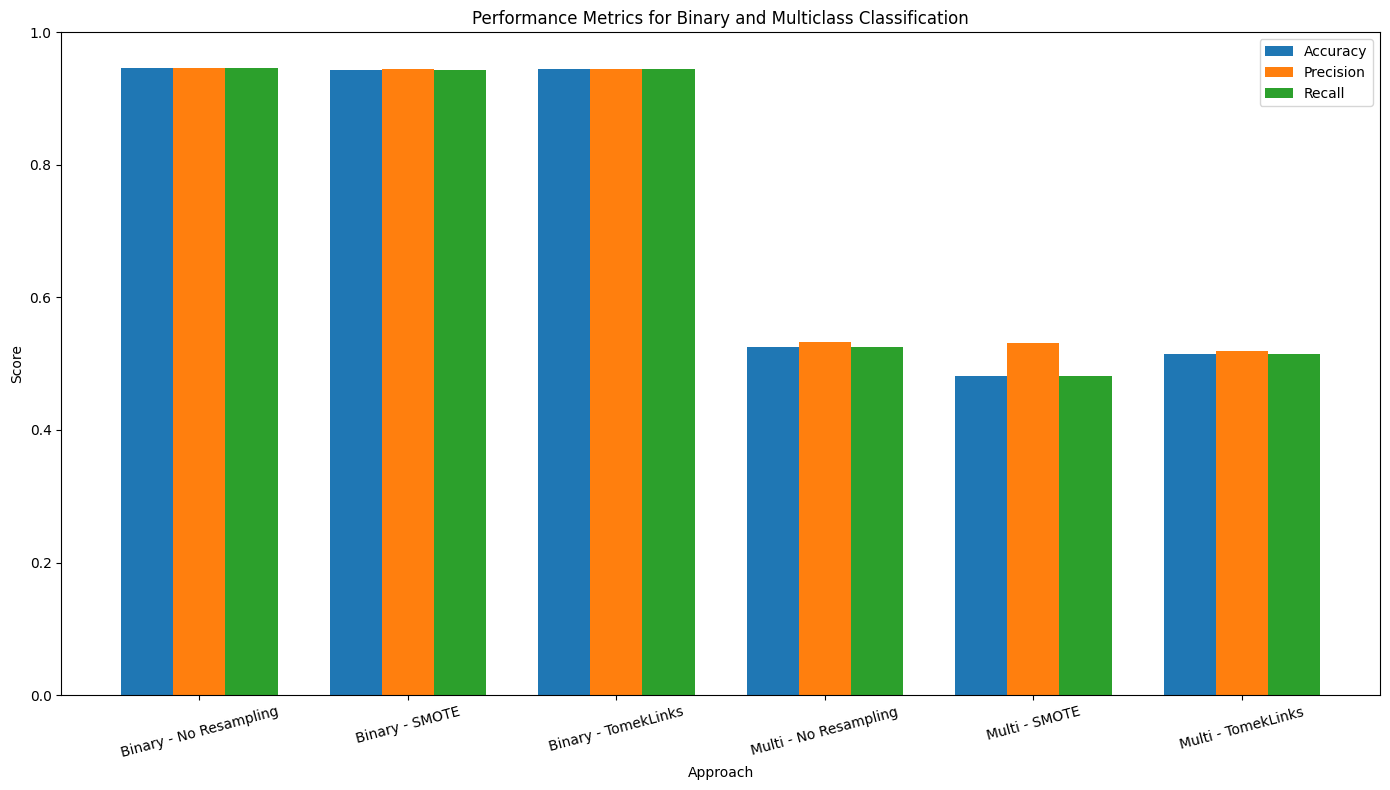

In [7]:
X_binary = df[
    ['satisfaction_level', 'last_evaluation', 'number_project']
]
y_binary = df['left']


X_multi = df[
    ['satisfaction_level', 'average_montly_hours', 'left']
]
y_multi = df['time_spend_company']

results = {}

def evaluate_and_store_metrics(X, y, model, sampling_strategy=None, label="Approach"):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
    from sklearn.model_selection import StratifiedKFold
    import numpy as np

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []
    precisions = []
    recalls = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        if sampling_strategy:
            X_train, y_train = sampling_strategy.fit_resample(X_train, y_train)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='weighted'))
        recalls.append(recall_score(y_test, y_pred, average='weighted'))

    print(f'Average Accuracy: {np.mean(accuracies)}')
    print(f'Average Precision: {np.mean(precisions)}')
    print(f'Average Recall: {np.mean(recalls)}')

    results[label] = {
        'accuracy': np.mean(accuracies),
        'precision': np.mean(precisions),
        'recall': np.mean(recalls)
    }

def visualize_results(metrics_dict):
    approaches = list(metrics_dict.keys())
    accuracies = [metrics_dict[approach]['accuracy'] for approach in approaches]
    precisions = [metrics_dict[approach]['precision'] for approach in approaches]
    recalls = [metrics_dict[approach]['recall'] for approach in approaches]

    x = np.arange(len(approaches))
    width = 0.25

    plt.figure(figsize=(14, 8))

    plt.bar(x - width, accuracies, width, label='Accuracy')
    plt.bar(x, precisions, width, label='Precision')
    plt.bar(x + width, recalls, width, label='Recall')

    plt.xlabel('Approach')
    plt.ylabel('Score')
    plt.title('Performance Metrics for Binary and Multiclass Classification')
    plt.xticks(x, approaches, rotation=15)
    plt.ylim(0, 1)
    plt.legend()

    plt.tight_layout()
    plt.show()

from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

dt_model = DecisionTreeClassifier(random_state=42)

print("Бинарная классификация без балансировки:")
evaluate_and_store_metrics(X_binary, y_binary, dt_model, label="Binary - No Resampling")

print("\nБинарная классификация с SMOTE:")
smote = SMOTE(random_state=42)
evaluate_and_store_metrics(X_binary, y_binary, dt_model, sampling_strategy=smote, label="Binary - SMOTE")

print("\nБинарная классификация с TomekLinks:")
tomek = TomekLinks()
evaluate_and_store_metrics(X_binary, y_binary, dt_model, sampling_strategy=tomek, label="Binary - TomekLinks")

print("\nМультиклассовая классификация без балансировки:")
evaluate_and_store_metrics(X_multi, y_multi, dt_model, label="Multi - No Resampling")

print("\nМультиклассовая классификация с SMOTE:")
evaluate_and_store_metrics(X_multi, y_multi, dt_model, sampling_strategy=smote, label="Multi - SMOTE")

print("\nМультиклассовая классификация с TomekLinks:")
evaluate_and_store_metrics(X_multi, y_multi, dt_model, sampling_strategy=tomek, label="Multi - TomekLinks")

visualize_results(results)